In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np

from hierarchical_bayes_nmr_validation import *

In [2]:
protein = '1UBQ'
bmrb_code = '6457'
samples = 2000

C:\Users\User\Documents\Agustina\Hierarchical-Bayes-NMR-Validation\cheshift\_cheshift.py:661: RuntimeWarning: Mean of empty slice
  cs_theo_ave = np.nanmean(cs_theo_array, axis=0)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, β, α, beta_sd, alpha_sd]
Could not pickle model, sampling singlethreaded.
Sequential sampling (4 chains in 1 job)
NUTS: [σ, β, α, beta_sd, alpha_sd]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 46 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


[ 1. 18. 81.]
 PyMOL not running, entering library mode (experimental)
Search working directory for a PyMol session of protein 1UBQ


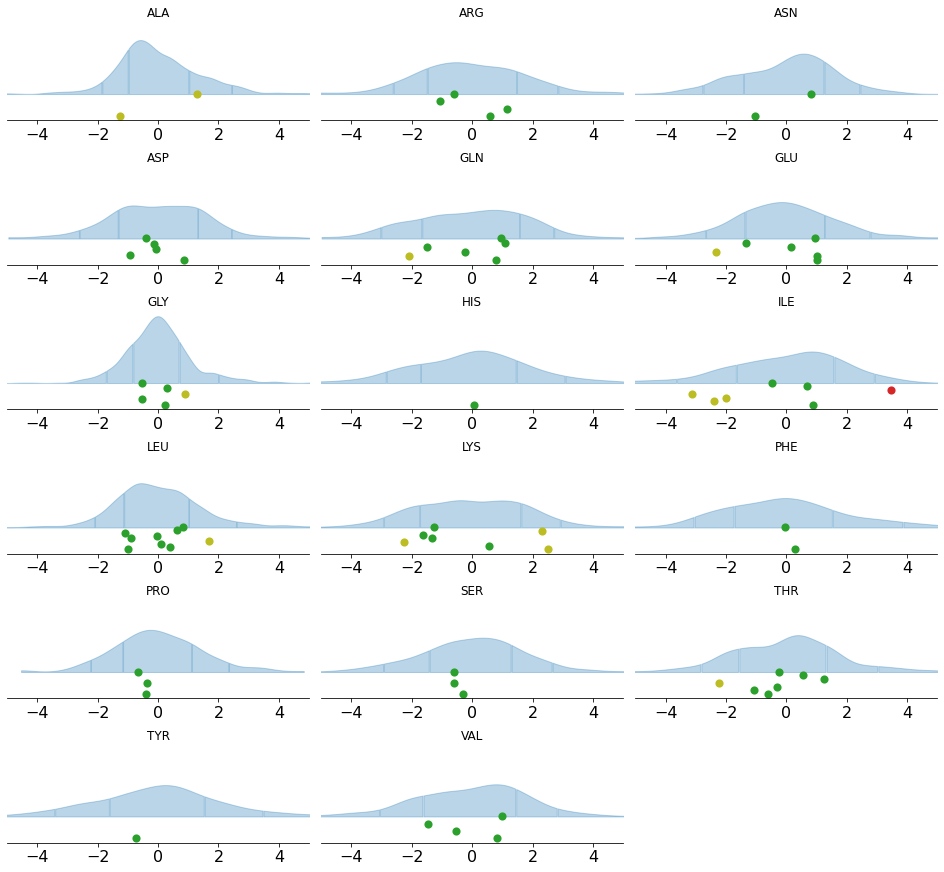

In [3]:
ax, dataframe, perc_dict, trace, pps = plot_cs_differences(protein, 
                                                save=True, 
                                                pymol_session=True, 
                                                bmrb_code=bmrb_code)

# LOO

In [4]:
_, _, reference_dataframe = load_data()
mean_teo = reference_dataframe["ca_teo"].mean()
mean_exp = reference_dataframe["ca_exp"].mean()
std_teo = reference_dataframe["ca_teo"].std()
std_exp = reference_dataframe["ca_exp"].std()

In [5]:
idata = az.from_pymc3(trace, posterior_predictive={"cheshift":pps})
idata.observed_data['cheshift'] = idata.observed_data['cheshift'] * std_exp + mean_exp

c:\users\user\documents\agustina\arviz\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


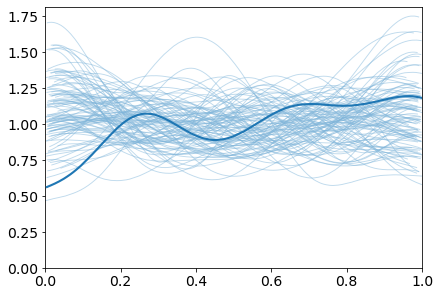

In [6]:
az.plot_loo_pit(idata, y="cheshift", legend=False);

# $\hat \kappa $ parameter

c:\users\user\documents\agustina\arviz\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
c:\users\user\documents\agustina\arviz\arviz\stats\stats.py:684: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


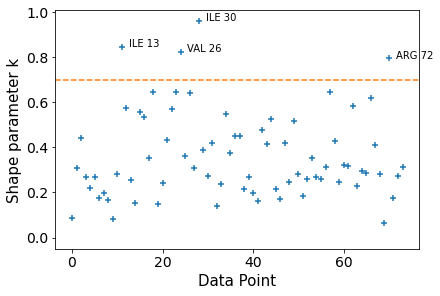

In [7]:
loo = az.loo(trace, pointwise=True)
ax = az.plot_khat(loo, hlines_kwargs={"alpha":0})
ax.axhline(0.7, color='C1', ls='--')

da = dataframe.res[loo.pareto_k.values > 0.7]
xs = da.index.values + 1
text = [a + " " + str(b) for a, b in zip(da, xs)]
ys = loo.pareto_k[loo.pareto_k > 0.7].values

for tx, x, y in zip(text, xs, ys):
    ax.annotate(tx, (x + 0.5 - dataframe.index[0], y));

# ELPD

c:\users\user\documents\agustina\arviz\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
c:\users\user\documents\agustina\arviz\arviz\stats\stats.py:684: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


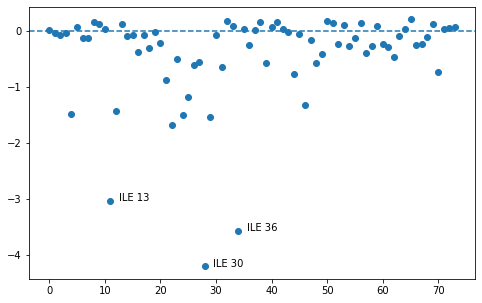

In [8]:
_, ax = plt.subplots(figsize=(8,5))
loo_i = az.loo(trace, pointwise=True).loo_i.values
ax.scatter(range(len(loo_i)), loo_i)
ax.axhline(0, 0, len(loo_i), linestyle='dashed')
da_1 = dataframe.res[loo_i > 2]
da_2 = dataframe.res[loo_i < -2]
da = pd.concat([da_1, da_2])
xs = da.index.values+1
text = [a + " " + str(b) for a, b in zip(da, xs)]
ys = np.concatenate([loo_i[loo_i > 2], loo_i[loo_i < -2]])

for tx, x, y in zip(text, xs, ys):
    ax.annotate(tx, (x + 0.5 - dataframe.index[0], y) );